<div style ="background-color:#6666; color:#ffff; border-radius:25px; font-size:25px; text-align:center; padding:10px;">Mental Health Ananlysis</div>

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [122]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")

In [123]:
test_df.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [124]:
train_df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [125]:
#Shape of the Data
print(f"Shape of Train Data : {train_df.shape}")
print(f"Shape of Test Data : {test_df.shape}")


Shape of Train Data : (140700, 20)
Shape of Test Data : (93800, 19)


In [126]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [127]:
train_df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [128]:
test_df.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [129]:
train_df = train_df[['Gender','Age','Working Professional or Student','Profession','Academic Pressure','Job Satisfaction','Work Pressure','CGPA','Study Satisfaction','Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Work/Study Hours','Financial Stress','Family History of Mental Illness','Depression']]
test_df  = test_df[['Gender','Age','Working Professional or Student','Profession','Academic Pressure','Job Satisfaction','Work Pressure','CGPA','Study Satisfaction','Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Work/Study Hours','Financial Stress','Family History of Mental Illness']]

In [130]:
# test_df.head()

In [131]:
#test = train_df[train_df['Work Pressure'].isnull() & train_df['Working Professional or Student']]
#test.shape

### From the observations it was noticed that the missing values are due to certain reasons such as students don't have work profession , work pressure ,Job satisfication and working prefessions are not having any academic pressure, CGPA , Academic Satisfication

### For these imputing the missing values with 0 will be a good imputauion technique

In [132]:
train_df['Profession']=train_df['Profession'].fillna('')
test_df['Profession'] = test_df['Profession'].fillna('')

In [133]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

In [134]:
# train_df.isnull().sum()
# test_df.isnull().sum()

In [135]:
print(f"Duplicates in Train Data : {train_df.duplicated().sum()}")
print(f"Duplicates in Test Data : {test_df.duplicated().sum()}")


Duplicates in Train Data : 115
Duplicates in Test Data : 53


In [136]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [137]:
#print(f"Duplicates in Train Data : {train_df.duplicated().sum()}")
#print(f"Duplicates in Test Data : {test_df.duplicated().sum()}")

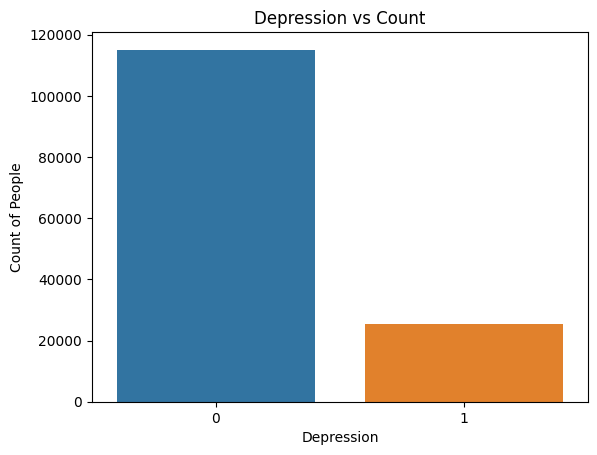

In [138]:
sns.countplot(x=train_df['Depression'])
plt.xlabel("Depression")
plt.ylabel("Count of People")
plt.title("Depression vs Count")
plt.show()

# Unbalanced Dataset

<Axes: xlabel='Gender', ylabel='count'>

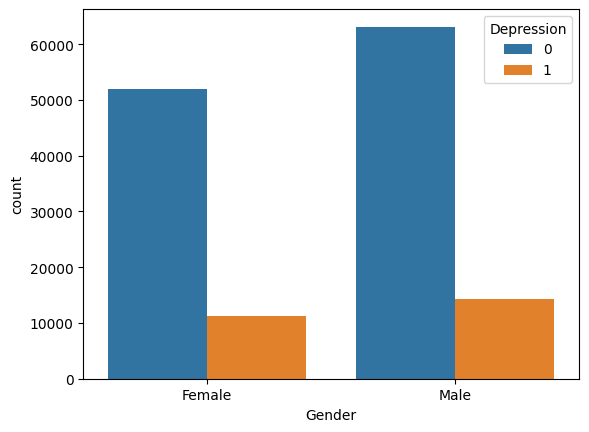

In [139]:
sns.countplot(x=train_df['Gender'],hue=train_df['Depression'])

### Mostly Men are Having Mental Depression

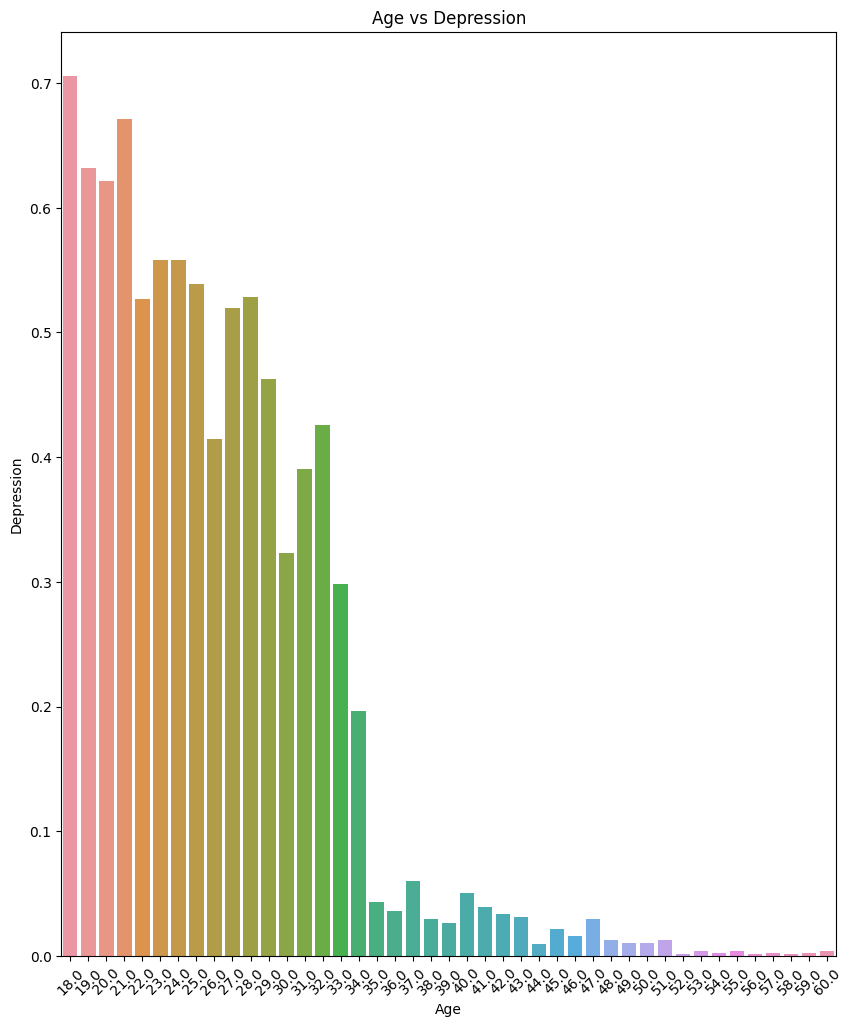

In [140]:
plt.figure(figsize=(10,12))
sns.barplot(data=train_df , x='Age',y='Depression',ci =None)
plt.xlabel("Age")
plt.xticks(rotation=45)
plt.ylabel('Depression')
plt.title("Age vs Depression")
plt.show()

### Age Between 18 and 34 are mostly(Youngsters) having stress 

In [141]:
train_df['Dietary Habits'].unique()

train_df['Dietary Habits'] = train_df['Dietary Habits'].apply(lambda x: "Unknown" if x not in ['Healthy','Unhealthy',
                                                                                                'Moderate','More Healthy',
                                                                                                'Less than Healthy','No Healthy',
                                                                                               'Less Healthy'] else x)

In [142]:
train_df['Degree'].unique()

train_df['Degree']  = train_df['Degree'].apply(lambda x: "Unknown" if x not in ['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD',
                                                                                 'BSc', 'ME', 'B.Arch', 'BCA', 'BE', 'MA', 
                                                                                 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 
                                                                                 'BA', 'M.Tech', 'PhD', 'M.Ed',  'MSc', 'B.Tech',
                                                                                 'LLM', 'MBBS', 'M.Pharm', 'MPA', 'BEd', 'B.Sc',
                                                                                 'BPharm', 'M.Arch', 'MPharm', 'BArch', 'LLBA',
                                                                                 'MTech', 'BPA', 'MEd', 'B BA', 'B.B.Arch', 
                                                                                 'M_Tech', 'LHM', 'S.Arch', 'LL B.Ed', 'M.S',
                                                                                 'K.Ed', 'E.Tech', 'Doctor', 'B B.Com'] else x)

In [143]:

numeric_columns = train_df.select_dtypes(exclude = 'object').columns
numeric_columns

Index(['Age', 'Academic Pressure', 'Job Satisfaction', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Work/Study Hours', 'Financial Stress',
       'Depression'],
      dtype='object')

In [144]:
categoric_columns = train_df.select_dtypes(include = 'object').columns
categoric_columns

Index(['Gender', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [145]:
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
label= LabelEncoder()
scaler = MinMaxScaler()

for col in categoric_columns:
    print(col)
    train_df[col] = label.fit_transform(train_df[col])
    print(col)


Gender
Gender
Working Professional or Student
Working Professional or Student
Profession
Profession
Sleep Duration
Sleep Duration
Dietary Habits
Dietary Habits
Degree
Degree
Have you ever had suicidal thoughts ?
Have you ever had suicidal thoughts ?
Family History of Mental Illness
Family History of Mental Illness


In [146]:
x = train_df.drop(columns=['Depression'])
y = train_df['Depression']

In [147]:
from sklearn.model_selection import train_test_split

x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2 ,random_state =42)

print(x_train.shape,y_train.shape, x_test.shape ,y_test.shape)

(112468, 16) (112468,) (28117, 16) (28117,)


In [149]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(x_train,y_train)


y_pred = DT.predict(x_test)



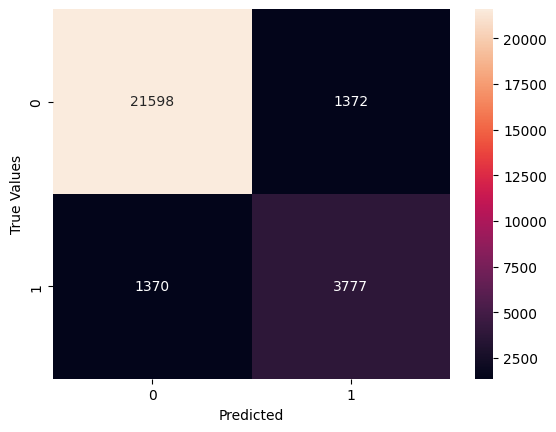

In [153]:
from sklearn.metrics import classification_report , confusion_matrix

cm = confusion_matrix(y_pred ,y_test)

sns.heatmap(cm , annot= True,fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("True Values")
plt.show()

In [154]:
print(classification_report(y_pred ,y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     22970
           1       0.73      0.73      0.73      5147

    accuracy                           0.90     28117
   macro avg       0.84      0.84      0.84     28117
weighted avg       0.90      0.90      0.90     28117

